# Part A 1


## Imports

In [3]:
#!/usr/bin/env python3
"""My code for Part A"""

%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import RcParams
import numpy as np
import matplotlib.pyplot as plt
from ParamID import *
from myStats import *

# from sympy import symbols, Eq

# Load data
filename = 'calibration.csv'
# filename = 'training1.csv'
data = np.loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, range_, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, sonar1, sonar2 = data.T


# Assume x = 0.01878 t
# so x * 53.2526 = t


t2x = 53.2526
xvals = np.arange(0, 3.5, 0.01)



## Sonar 1

### Sonar 1 Calibration

In [169]:
#### sonar 1 stuff


data1 = np.loadtxt('calibration.csv', delimiter=',', skiprows=1, usecols = (2,8))

# Split into columns
range__, sonar_1 = data1.T


rang= range__
y = sonar_1

msn1, cs2, error, new_range = myIRLS1(rang, y)
yLS = msn1 * rang + cs2

h_sn1 = lambda x: msn1* x +cs2

err_var_sn1 = np.var(error)
err_mean_sn1 = np.mean(error)

print(f"err varinace = {err_var_sn1}, error mean = {err_mean_sn1}")

xaxis_sn1, mean_x_sn1, var_x_sn1 = VarError(new_range, error)

title = 'Sonar1'


cur_h = h_sn1 

del range__
del sonar_1
del data1

err varinace = 0.0006703896227575027, error mean = -0.007549511375424903


### Sonar 1 check

In [5]:
print(var_x_sn1[9])
print(0.0015132603649066754)
print(xaxis_sn1[9])
print(1.0005521068897154)
print(h_sn1(5))

0.0015132603649066754
0.0015132603649066754
1.0005521068897154
1.0005521068897154
[4.92883167]


## IR3

### Don't use this

In [6]:
# y = raw_ir3
# a, b, c, d , e= myIRLS4(time, y)
# # plt.plot(time, y, '.', alpha=0.2)
# yLS = a*time*time*time*time + b*time*time*time + c*time*time + d*time + e
# # plt.plot(time, yLS2, '-')


In [7]:
# invTime = 1/time
# plt.plot(invTime, raw_ir3, '.', alpha=0.2)

This is the slow code cause i was trying to brute force the least squares

In [8]:
# a0, a1, b, c = my1LS1(time, raw_ir3)
# yLS = a0/(time+a1)  + b + c*(time)

# # plt.figure(figsize=(12, 6))
# # plt.subplot(121)
# plt.plot(time, raw_ir3, '.', alpha=0.2)
# plt.plot(time, yLS, '-')
# # plt.plot(time, range_)
# plt.title('Infrared 3')
# plt.xlabel('Time (s)')


In [9]:
# print(f"{a0}, {a1}, {b}, {c}")

### Use this one

In [176]:
from scipy.optimize import curve_fit

# a0, a1, b, c = 0.582131201106, 0.0751137033685, -0.32,	0.266263
# yLS = a0/(range_+a1)  + b + c*(range_)
# yLS = yLS[40:]
# time2 =  time[40:]

data1 = np.loadtxt('calibration.csv', delimiter=',', skiprows=1, usecols = (2,6))
range__, raw_ir3_= data1.T

y = raw_ir3_
rang = range__

h_ir3_model = lambda x, a0, a1, b, c: a0/(x +a1)  + b + c*(x)


params, cov = curve_fit(h_ir3_model, rang, y)

a0_ir3 = params[0]
a1_ir3 = params[1]
b_ir3 = params[2]
c_ir3 = params[3]

yLS = h_ir3_model(rang, *params)

# h = lambda x: a0/(x +a1)  + b + c*(x)

h_ir3 = lambda x: a0_ir3/(x +a1_ir3)  + b_ir3 + c_ir3*(x)

error = yLS - y
err_var_ir3 = np.var(error)
err_mean_ir3 = np.mean(error)


xaxis_ir3, mean_x_ir3, var_x_ir3 = VarError(rang, error, xstep=0.5)


title = 'Infrared 3'

cur_h = h_ir3

del range__
del raw_ir3_
del data1

### Ir3 check

In [11]:
print(var_x_ir3[4])
print(0.004886099309016672)

0.004886099309016672
0.004886099309016672


## IR4

### don't use this

In [12]:
# y = raw_ir4

# a, b, c, d , e= myIRLS4(time, y)
# # plt.plot(time, y, '.', alpha=0.2)
# yLS = a*time*time*time*time + b*time*time*time + c*time*time + d*time + e
# # plt.plot(time, yLS, '-') 
# title = "ir4"

In [13]:
# y = raw_ir4
# a0 = 1.5
# b0 = 35
# c0 = -166
# a1 = 1.14
# b1 = -31
# c1 = 500

# yLS = (a0*time**2 + b0*time + c0 ) / (a1*time**2 + b1*time + c1 )

### Use this one

In [161]:
from scipy.optimize import curve_fit

data1 = np.loadtxt('calibration.csv', delimiter=',', skiprows=1, usecols = (2,7))
range__, raw_ir4_= data1.T


rang = range__
y = raw_ir4_
# a0 = 4055.250
# b0 = 1863.84
# c0 = 150
# a1 = 3176.140
# b1 = -1650.83
# c1 = 600


h_ir4_model = lambda x, a0, b0, c0, a1, b1, c1: (a0*(x)**2 + b0*x + c0 ) / (a1*(x)**2 + b1*x + c1 )


# zfit = model(x, *params)
params, cov = curve_fit(h_ir4_model, rang, y)

a0_ir4 = params[0]
b0_ir4 = params[1]
c0_ir4 = params[2]
a1_ir4 = params[3]
b1_ir4 = params[4]
c1_ir4 = params[5]

yLS = h_ir4_model(rang, *params)
# yLS = (a0*range_**2 + b0*range_ + c0 ) / (a1*range_**2 + b1*range_ + c1 )
# h = lambda x: (a0*(x)**2 + b0*x + c0 ) / (a1*(x)**2 + b1*x + c1 )

h_ir4 = lambda x: (a0_ir4*(x)**2 + b0_ir4*x + c0_ir4 ) / (a1_ir4*(x)**2 + b1_ir4*x + c1_ir4 )

# max_hir4 = np.max(h_ir4(range_))
# print(max_hir4)
# print(range_[findIndex(max_hir4, h_ir4(range_))])
error = yLS - y
err_var_ir4 = np.var(error)
err_mean_ir4 = np.mean(error)
xaxis_ir4, mean_x_ir4, var_x_ir4 = VarError(rang, error, xstep=0.5)

print(xaxis_ir4)


title = "infrared 4"


cur_h = h_ir4

del range__
del raw_ir4_
del data1

[0.50082344 1.00055211 1.50030281 2.00059381 2.50070933 3.00066458]


## Normal Plot

Text(0.5, 0, 'x, range (m)')

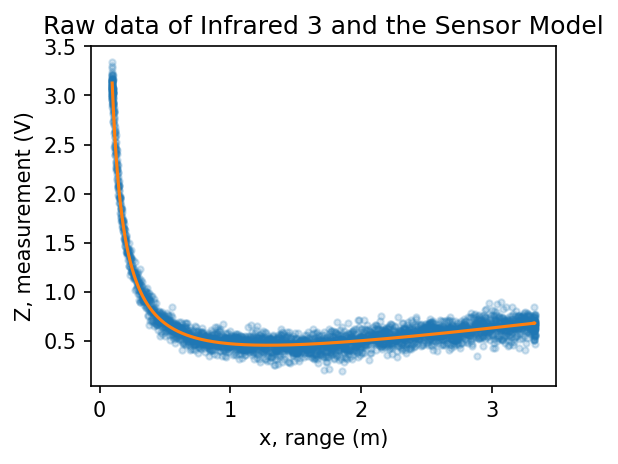

In [177]:
plt.figure(figsize=(4,3), dpi=150)
plt.plot(rang, y, '.', alpha=0.2)
plt.plot(rang, yLS, '-')

# plt.plot(time, range_)
plt.title(f"Raw data of {title} and the Sensor Model")
plt.ylabel('Z, measurement (V)')
plt.xlabel('x, range (m)')


## Plot error

Text(0.5, 0, 'x, Range (m)')

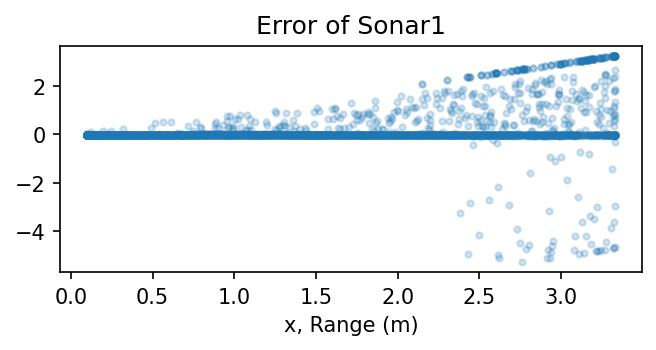

In [174]:
plt.figure(figsize=(5, 2), dpi = 150)
error = yLS - y

plt.plot(rang, error, '.', alpha=0.2)
# plt.plot(time, yLS, '-')
# plt.plot(time, range_)
plt.title(f"Error of {title}")
plt.xlabel('x, Range (m)')

## Histogram of error

Text(0.5, 1.0, 'Histogram of error of Sonar1')

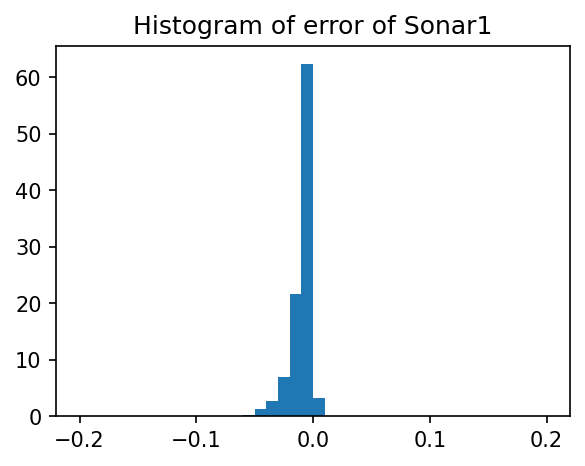

In [173]:
error = yLS-y
plot1 = plt.figure(figsize=(4, 3), dpi=150)
plt.hist(error, bins=40, range=(-0.2,0.2), density=True)
plt.tight_layout()
plt.title(f"Histogram of error of {title}")


## Error variance and mean

In [84]:
error_var = np.var(error)
error_mean = np.mean(error)
print(f"variance: {error_var},  mean: {error_mean}")

variance: 0.8329152364915298,  mean: 0.18163199978729486


## Variable Error

Text(0.5, 1.0, 'Variance and Mean of infrared 4')

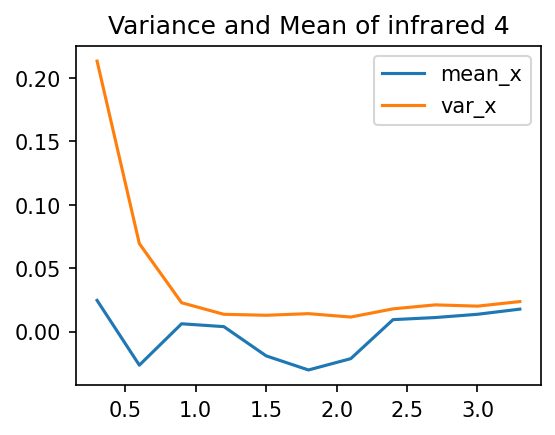

In [166]:
error =  yLS  - y

xaxis, mean_x, var_x = VarError(rang, error, 0.3)

plt.figure(figsize=(4,3), dpi=150)
plt.plot(xaxis, mean_x)
plt.plot(xaxis, var_x)
plt.legend(["mean_x", "var_x"])
plt.title(f"Variance and Mean of {title}")

In [20]:
# mean = 0; std = 1; variance = np.square(std)
# x = np.arange(-5,5,.01)
# f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

# plt.plot(x,f)
# plt.ylabel('gaussian distribution')
# plt.show()

In [21]:
# # x = np.arange(0, 500, err_mean_sn1)
# x= range_
# fish1 = N(x, 1.5, 0.2)
# # fish2 = N(range_, 2, 0.2)
# # fish = fish1 *fish2 
# # plt.plot(range_, fish)
# plt.plot(x, fish1)
# # plt.plot(range_, fish2)
# # plt.legend(["0", "1", "2"])

# print(max(fish1))
# print(np.trapz(fish1, x, dx = 0.02))

# Part A 2

## Motion model

In [22]:
dt = 0.01

g = lambda x_prev, u, dt: u * dt

W = lambda x_now, x_prev, u_prev, dt: x_now - x_prev - g(x_prev, u_prev, dt)
X_now = lambda x_prev, u_prev, dt: x_prev + g(x_prev, u_prev, dt) #+ Wcur

## Imports

In [179]:
#!/usr/bin/env python3
"""My code for Part A 2"""

# Load data
filename = 'training1.csv'
data1 = np.loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, range_, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, sonar1, sonar2 = data1.T



In [181]:

filename = 'training2.csv'
data2 = np.loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, range_, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, sonar1, sonar2 = data2.T


In [65]:

# filename = 'test.csv'
# data2 = np.loadtxt(filename, delimiter=',', skiprows=1)

# # Split into columns
# index, time, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, sonar1, sonar2 = data2.T


## next

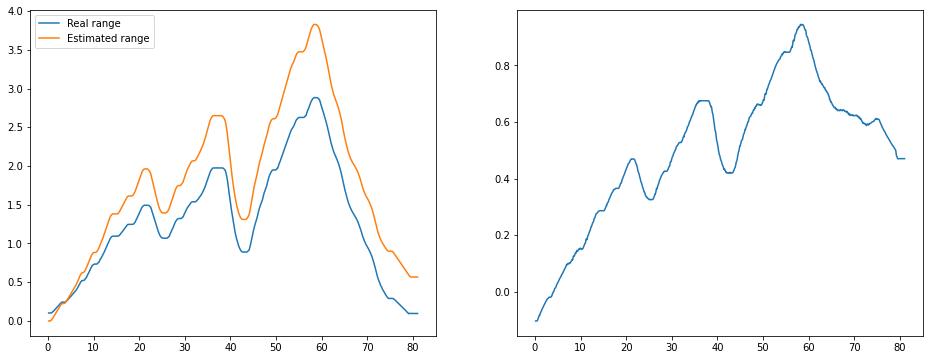

In [192]:
# %%
# plt.plot(time, velocity_command)

command = velocity_command
truex = range_
t = time

x_estimate = np.array([0])
x_now = 0
#process noise
w_all = np.array([0])

for i in range(1, len(t)):
    dt = t[i] - t [i-1]
    x_now = X_now(x_now, command[i-1], dt   )#   , W(x_estimate[i-1], command[i-1], dt))
    w_cur = W(x_now, x_estimate[i-1], command[i-1], dt)
    w_all = np.append(w_all, w_cur)
    x_estimate = np.append(x_estimate, x_now)


plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(t, truex)
plt.plot(t, x_estimate)
# plt.plot(t, x_estimate - w_all)

plt.legend(["Real range", "Estimated range", " "])

plt.subplot(122)
plt.plot(t,  x_estimate - truex -w_all)

In [193]:
#process noise var
# probably can assume dt = 0.06 seconds

w_var = np.var(w_all)
w_mean = np.mean(w_all)
print("I think can assume dt = 0.06 s")
print(f"w var = {w_var}\nw mean = {w_mean}")

W_var = np.var(x_estimate - truex -w_all)
W_mean = np.mean(x_estimate - truex -w_all)

# error = w_all
# plot1 = plt.figure(figsize=(4, 3), dpi=150)
# plt.hist(error, bins=150, range=(-2,2), density=True)
# plt.tight_layout()
# plt.title(f"Histogram of error of W")

I think can assume dt = 0.06 s
w var = 6.996812231955584e-33
w mean = -3.948824934736279e-18


### Here is the commanded speed and actual speed calculations. maybe not used

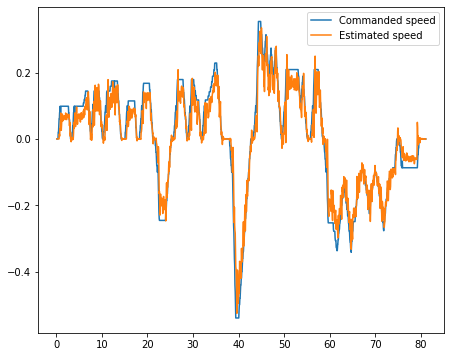

In [28]:
# plt.plot(time, velocity_command)

command = velocity_command
truex = range_
t = time

# x_estimate = np.array([0])
speed_est = np.array([0])

#process noise
w_all = np.array([0])

for i in range(1, len(t)):
    dt = t[i] - t [i-1]

    curspeed = (truex[i] - truex[i-1])/dt
    speed_est = np.append(speed_est, curspeed)
    # x_now = X_now(x_estimate[i-1], command[i-1], dt   )#   , W(x_estimate[i-1], command[i-1], dt))
    # w_cur = W(x_now, x_estimate[i-1], command[i-1], dt)
    # w_all = np.append(w_all, w_cur)
    # x_estimate = np.append(x_estimate, x_now)

plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(t, command)
plt.plot(t, speed_est)
# plt.plot(t, x_estimate + w_all)

plt.legend(["Commanded speed", "Estimated speed"])

# plt.subplot(122)
# plt.plot(t, + w_all)


## Next

# Part A 3

### functions

In [134]:

def diff(func, x):
    dx = 0.001
    return (func(x + dx) - func(x))/dx

def invertH(hfunc, z, rnge=(0,10)):
    half = (rnge[1] - rnge[0])/2
    curguess = rnge[1]/2
    lim = 0
    maxLim = 1000
    while(np.abs(hfunc(curguess) - z )> 0.0001 and lim < maxLim):
        # print(f"curguess {curguess}, z {z}")
        lim+=1
        if (hfunc(curguess) > z):
            # print(f"curguess {curguess}")
            if diff(hfunc,curguess) > 0: # if positive slope
                curguess -= half/2  
            else:
                curguess += half/2 
        else:
            if diff(hfunc,curguess) > 0: # if positive slope
                curguess += half/2  
            else:
                curguess -= half/2 
        half /= 2
    # if lim >= maxLim:
    #     pass
    #     # print("max")
    if(np.abs(hfunc(curguess) - z )> 0.0001):
        return None
    else:
        return curguess


def ambInvertH(hfunc, z, mid, rnge=(0,4)):
    guess = invertH(hfunc, z, rnge=(0,mid))
    guess2 = invertH(hfunc, z, rnge=(mid,5))
    return guess, guess2


def findIndex(needle, haystack):
    ind = 0
    for hay in haystack:
        if np.abs(hay - needle) < 1:
            return ind
        ind += 1
    print("#1",end = "")
    return None


def findIndex2(needle, haystack):
    ind = 0
    for hay in haystack:
        if hay > needle:
            return ind
        ind += 1
    print("#2",end = "")
    return ind-1




### Inversion seems to be working fine

3
0.3330078125
3.0000168316135105
0.8614501953125
3.000045065329325


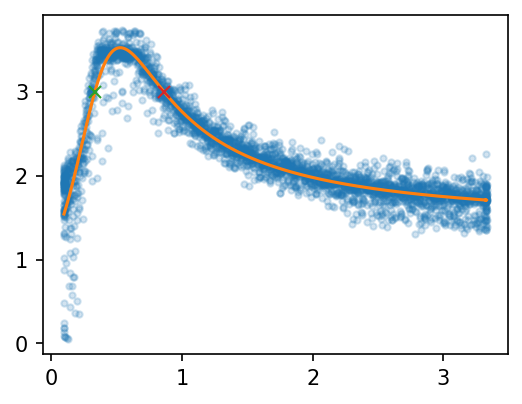

In [30]:

# cur_z = raw_ir3[260]
cur_z = 3

print(cur_z)
gus1, gus2 = ambInvertH(cur_h, cur_z, mid=1)

# plt.figure(figsize=(10, 10))
plt.figure(figsize=(4, 3), dpi=150)
plt.plot(rang, y, '.', alpha=0.2)
plt.plot(rang, cur_h(rang), '-')

try:
    plt.plot(gus1, cur_h(gus1),'x')
    print(gus1)
    print(cur_h(gus1))
except:
    pass
try:
    plt.plot(gus2, cur_h(gus2),'x')
    print(gus2)
    print(cur_h(gus2))
except:
    pass
    #



# # plt.plot(range_, h_ir3(range_), '-')

# # plt.plot(time, range_)
# plt.title(title)
# plt.ylabel('Z, measurement (V)')
# plt.xlabel('x, range (m)')


## Likelihood stuff

### Run this before likelihood stuff

In [31]:
fish = findIndex(2.5, range_)
# time[t]

x_region = range_#[t-500: t+500]
# for x in xaxis_ir3:

# xaxis_ir3, mean_x_ir3, var_x_ir3 = VarError(range_, error)


# plt.figure(figsize=(15, 3))
# plt.xlim(0, np.max(x_region))

print(f"true range {range_[fish]}")



true range 1.5046143781181267


In [32]:
# fish = 500

### Sonar Likelihood

sonar guess 1.52001953125


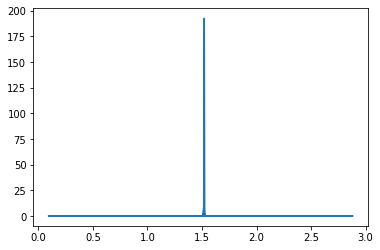

In [33]:
g1, val= invertH(h_sn1, sonar1[fish])
L_sn1 = N(x_region, g1,  err_var_sn1)#err_var_sn1
sonarPlot = plt.plot(x_region, L_sn1)


print(f"sonar guess {g1}")
# print(f"area = {np.trapz(L_sn1, x_region, dx = 0.02)}")

### ir3 likelihood

ir3 1 guess 0.90234375
ir3 2 guess 1.833984375


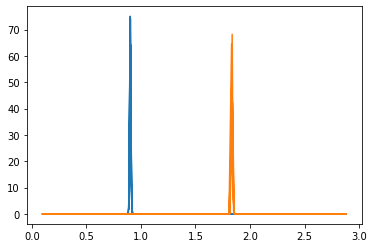

In [34]:
# print(f"\n {raw_ir3[t]}\n")
g1ir3, g2ir3 = ambInvertH(h_ir3, raw_ir3[fish], mid=1)
if (not g1ir3 == None):
    # ind = findIndex(g1ir3, xaxis_ir3)
    L_1ir3 = N(x_region ,g1ir3, err_var_ir3) #  var_x_ir3[ind]
    print(f"ir3 1 guess {g1ir3}")
    ir31Plot = plt.plot(x_region, L_1ir3)
else:
    L_1ir3 = N(x_region ,0, 100000) #  var_x_ir3[ind]
    ir31Plot = plt.plot(x_region, L_1ir3)
    # ir31Plot = plt.plot()
    

if (not g2ir3 == None):
    # ind = findIndex(g2ir3, xaxis_ir3)
    L_2ir3 = N(x_region, g2ir3, err_var_ir3) #var_x_ir3[ind]
    print(f"ir3 2 guess {g2ir3}")
    ir32Plot = plt.plot(x_region, L_2ir3)
else:
    L_2ir3 = N(x_region ,0, 100000) #  var_x_ir3[ind]
    ir32Plot = plt.plot(x_region, L_1ir3)

    # ir32Plot = plt.plot()


### ir4 likelihood

ir4 1 guess 0.21769042968750002
ir4 2 guess 1.4543505859375


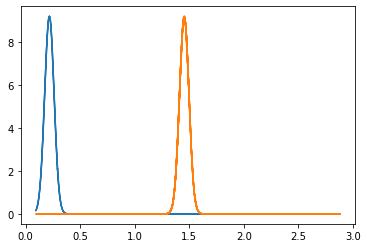

In [35]:
    
g1ir4, g2ir4 = ambInvertH(h_ir4, raw_ir4[fish], mid=0.44)
if (not g1ir4 == None):
    # ind = findIndex(g1ir4, xaxis_ir4)
    L_1ir4 = N(x_region ,g1ir4, err_var_ir4)# var_x_ir4[ind]
    print(f"ir4 1 guess {g1ir4}")
    ir41Plot = plt.plot(x_region, L_1ir4)
else:
    ir41Plot = plt.plot()

if (not g2ir4 == None):
    # ind = findIndex(g2ir4, xaxis_ir4)
    L_2ir4 = N(x_region, g2ir4, err_var_ir4)#var_x_ir4[ind]
    print(f"ir4 2 guess {g2ir4}")
    ir42Plot = plt.plot(x_region, L_2ir4)
else:
    ir42Plot = plt.plot()

    

### All likelihoods?

max likely = 195.3847916046417
likelihood is = 0.5240969324885836, true is = 1.5046143781181267


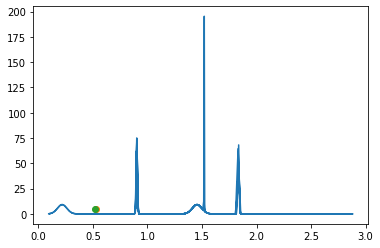

In [36]:
# allL = L_sn1
allL =  L_1ir4 
allL += L_2ir4 
allL += L_sn1 
allL += L_1ir3
allL += L_2ir3


# while (np.max(allL) > 100):
#     allL /= 10

combinedPlot = plt.plot(x_region, allL)

likelihood = np.max(allL)
print(f"max likely = {likelihood}")


ind = findIndex(likelihood, allL)
likely2b = rang[ind]

guessPlot = plt.plot(likely2b, 5, 'o')
truePlot = plt.plot(rang[fish], 5, 'o')

print(f"likelihood is = {likely2b}, true is = {range_[fish]}")


# plt.legend(["sonar", "ir3 1", "ir3 2","ir4 1", "ir4 2", "combined", "true range"]) #[sonarPlot,ir31Plot,ir32Plot, combinedPlot,truePlot],



## BLUE

In [37]:
t = 264
print(range_[t])

totalvar = 0
topsum = 0
g_sonar, _= invertH(h_sn1, sonar1[t])
varsn1 = var_x_sn1[findIndex2(g_sonar, xaxis_sn1)]

topsum += g_sonar/varsn1
totalvar += 1/varsn1


g_1ir3, g_2ir3 = ambInvertH(h_ir3, raw_ir3[t], mid=1)
if (not g_1ir3 == None):
    varir31 = var_x_ir3[findIndex2(g_1ir3, xaxis_ir3)]
    topsum += g_1ir3/varir31
    totalvar += 1/varir31

if (not g_2ir3 == None):
    varir32 = var_x_ir3[findIndex2(g_2ir3, xaxis_ir3)]
    topsum += g_2ir3/varir32
    totalvar += 1/varir32

g_1ir4, g_2ir4 = ambInvertH(h_ir4, raw_ir4[t], mid=0.44)
if (not g_1ir4 == None):
    varir41 = var_x_ir4[findIndex2(g_1ir4, xaxis_ir4)]
    topsum += g_1ir4/varir41
    totalvar += 1/varir41
if (not g_2ir4 == None):
    varir42 = var_x_ir4[findIndex2(g_2ir4, xaxis_ir4)]
    topsum += g_2ir4/varir42
    totalvar += 1/varir42


g_blue = topsum / totalvar
print(g_blue)

1.1293332929298636
1.1387828138345482


## Time based thing

t=0t=100t=200t=300t=400t=500t=600#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2t=700#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2#2t=800#2#2#2#2#2#2#2#2#2t=900t=1000t=1100t=1200t=1300t=1400t=1500t=1600t=1700t=1800t=1900114.259310961


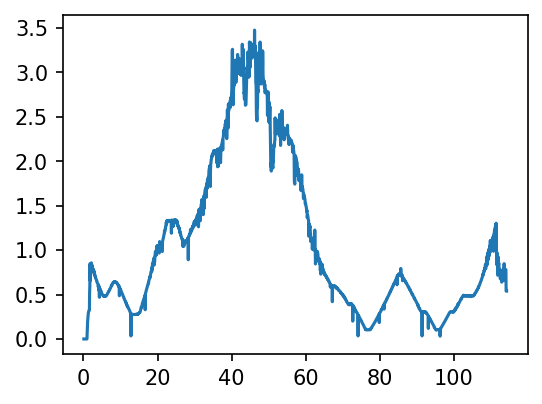

In [143]:

range_est = np.array([])
dt = 0.06
g_blue = 0

 

x_estimate = np.array([0])
x_now = 0

tooFar = 0.3
theend = len(time)-1
for t in range(0, theend): #len(time)
    if (np.mod(t, 100) == 0) :
        print(f"t={t}", end = "")


    totalvar = 0
    topsum = 0

    x_now = X_now(g_blue, velocity_command[t-1], dt   )#   , W(x_estimate[i-1], command[i-1], dt))

    # x_estimate = np.append(x_estimate, x_now)

    if not np.isnan(x_now):
        topsum += x_now/W_var
        totalvar += 1/W_var
    


    g_sonar= invertH(h_sn1, sonar1[t])
    varsn1 = var_x_sn1[findIndex2(g_sonar, xaxis_sn1)]
    # varsn1 = 0.8

    if (np.abs(g_blue - g_sonar) < tooFar):
        topsum += g_sonar/varsn1
        totalvar += 1/varsn1


    g_1ir3, g_2ir3 = ambInvertH(h_ir3, raw_ir3[t], mid=1)
    # if (not g_1ir3 == None and not g_2ir3 == None):
    #     if np.abs(g_1ir3 -g_blue) < np.abs(g_2ir3 -g_blue):
    #         g_2ir3 = None
    #     else:
    #         g_1ir3 = None
            
    if (not g_1ir3 == None and np.abs(g_blue - g_1ir3) < tooFar):
        varir31 = var_x_ir3[findIndex2(g_1ir3, xaxis_ir3)]
        # varir31 = 0.5
        topsum += g_1ir3/varir31
        totalvar += 1/varir31

    if (not g_2ir3 == None and np.abs(g_blue - g_2ir3) < tooFar):
        varir32 = var_x_ir3[findIndex2(g_2ir3, xaxis_ir3)]
        # varir32 = 0.5
        topsum += g_2ir3/varir32
        totalvar += 1/varir32

    g_1ir4, g_2ir4 = ambInvertH(h_ir4, raw_ir4[t], mid=0.44)

    # if (not g_1ir4 == None and not g_2ir4 == None):
    #     if np.abs(g_1ir4 -g_blue) < np.abs(g_2ir4 -g_blue):
    #         g_2ir4 = None
    #     else:
    #         g_1ir4 = None
            


    if (not g_1ir4 == None and np.abs(g_blue - g_1ir4) < tooFar):
        varir41 = var_x_ir4[findIndex2(g_1ir4, xaxis_ir4)]
        # varir41 = 0.5
        topsum += g_1ir4/varir41
        totalvar += 1/varir41
    if (not g_2ir4 == None and np.abs(g_blue - g_2ir4) < tooFar):
        varir42 = var_x_ir4[findIndex2(g_2ir4, xaxis_ir4)]
        # varir42 =0.5
        topsum += g_2ir4/varir42

        totalvar += 1/varir42
             
    if (totalvar != 0):
        g_blue = topsum / totalvar
    
    range_est = np.append(range_est, g_blue)



    # print(g_blue)
plt.figure(figsize=(4,3), dpi = 150 )
plt.plot(time[0:theend], range_est)
print(time[theend])

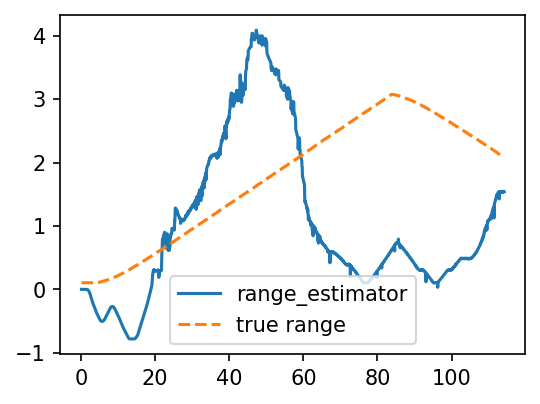

In [93]:
plt.figure(figsize=(4,3), dpi = 150 )
plt.plot(time[0:theend], range_est)
plt.plot(time[0:theend], range_[0:theend], '--' )
plt.legend(["range_estimator", "true range"])
# x_estimate= np.delete(x_estimate, 0)
# plt.plot(time, x_estimate)


In [62]:
print(range_est[0:10])

[0.05448681 0.08184853 0.09525251 0.10182949 0.10548058 0.10717824
 0.10779508 0.10827115 0.10841468 0.10856559]


In [ ]:
# for i in range_est:
#     if np.isnan(i):
#         print("n", end = " ")
#     else:
#         pass
#         # print(i, end = " ")
    

## Bayesian filter ? Probably kalman filter

t=00  1  2  3  4  5  6  7  8  9  10  11  12  13  14  t=100t=200299  t=300t=400467  t=500566  572  590  596  t=600662  666  667  668  676  688  t=700700  701  702  710  711  716  720  727  730  732  734  740  742  743  748  753  762  771  772  773  779  780  789  t=800800  803  805  809  813  819  820  848  850  851  854  855  859  866  875  t=900911  t=1000t=1100t=1200t=1300t=1400t=1500t=1600t=1700t=1800t=1900114.259310961


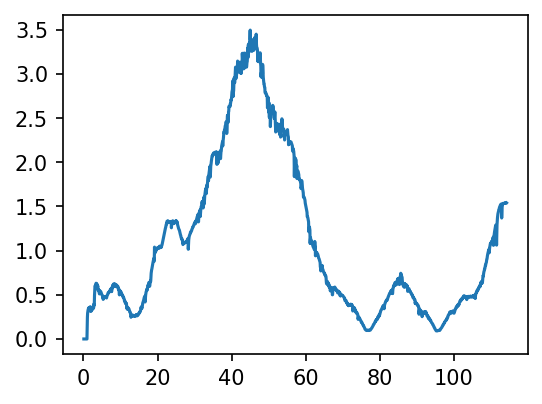

In [155]:
from scipy.optimize import minimize_scalar


range_est_KF = np.array([])
dt = 0.06
g_blue = 0

 

x_estimate = np.array([0])
x_now = 0
var_x_posterior = 0.1
x_posterior = 0

tooFar = 0.3
theend = len(time)-1



def xML(h_func, guess, var):
    xml_1 = lambda x: ((guess-h_func(x))/var)**2
    return minimize_scalar(xml_1).x


for t in range(0, theend): #len(time)
    if (np.mod(t, 100) == 0) :
        print(f"t={t}", end = "")


    totalvar = 0
    topsum = 0



    g_sonar = invertH(h_sn1, sonar1[t])
    
    # v_varsn1 = var_x_sn1[findIndex2(g_sonar, xaxis_sn1)]
    # g_sonar = xML(h_sn1, g_sonar, v_varsn1)

    v_varsn1 = err_var_sn1
    varsn1 = v_varsn1
    # varsn1 = v_varsn1/(diff(h_sn1, g_sonar))**2
    # varsn1 = 0.8

    if (np.abs(x_posterior - g_sonar) < tooFar):
        
        topsum += g_sonar/varsn1
        totalvar += 1/varsn1


    g_1ir3, g_2ir3 = ambInvertH(h_ir3, raw_ir3[t], mid=1)

            
    if (not g_1ir3 == None and np.abs(x_posterior - g_1ir3) < tooFar):
        # v_varir31 = var_x_ir3[findIndex2(g_1ir3, xaxis_ir3)]
        # g_1ir3 = xML(h_ir3, g_1ir3, v_varir31)

        v_varir31 = err_var_ir3
        varir31 = v_varir31 / (diff(h_ir3, g_1ir3))**2
        # varir31 = 0.5
        topsum += g_1ir3/varir31
        totalvar += 1/varir31

    if (not g_2ir3 == None and np.abs(x_posterior - g_2ir3) < tooFar):
        # v_varir32 = var_x_ir3[findIndex2(g_2ir3, xaxis_ir3)]
        # g_2ir3 = xML(h_ir3, g_2ir3, v_varir32)

        v_varir32 = err_var_ir3
        varir31 = v_varir32 / (diff(h_ir3, g_2ir3))**2
        # varir32 = 0.5
        topsum += g_2ir3/varir32
        totalvar += 1/varir32

    g_1ir4, g_2ir4 = ambInvertH(h_ir4, raw_ir4[t], mid=0.44)
          


    if (not g_1ir4 == None and np.abs(x_posterior - g_1ir4) < tooFar):
        # v_varir41 = var_x_ir4[findIndex2(g_1ir4, xaxis_ir4)]
        # g_1ir4 = xML(h_ir4, g_1ir4, v_varir41)

        v_varir41 = err_var_ir4
        varir41 = v_varir41 / (diff(h_ir4, g_1ir4))**2
        # varir41 = 0.5
        topsum += g_1ir4/varir41
        totalvar += 1/varir41
    if (not g_2ir4 == None and np.abs(x_posterior - g_2ir4) < tooFar):
        # v_varir42 = var_x_ir4[findIndex2(g_2ir4, xaxis_ir4)]
        # g_2ir4 = xML(h_ir4, g_2ir4, v_varir42)

        v_varir42 = err_var_ir4
        varir42 = v_varir42 / (diff(h_ir4, g_2ir4))**2
        # varir42 =0.5
        topsum += g_2ir4/varir42

        totalvar += 1/varir42

    if (np.isnan(g_blue)):
        print(f"blue nan at t = {t}")
        break

        ## predict step
    if (totalvar != 0):
        g_blue = topsum / totalvar
    
        # uses previous x_posterior
        x_prior = X_now(x_posterior, velocity_command[t-1], dt   )#   , W(x_estimate[i-1], command[i-1], dt))


        #so these uses the previous step's var_x_posterior
        var_x_prior = var_x_posterior + w_var
        K_now = (var_x_posterior + w_var)/( var_x_posterior + w_var + totalvar)

        var_x_posterior = (1-K_now) * var_x_prior

        #calculates new x_posterior
        totalvar *= K_now
        x_posterior = x_prior/var_x_posterior + g_blue/totalvar
        x_posterior/= (1/var_x_posterior) +(1/totalvar)
        # print(t)
    else:
        print(t, end = "  ")
        x_posterior = X_now(x_posterior, velocity_command[t-1], dt   )#   , W(x_estimate[i-1], command[i-1], dt))


    if (np.isnan(x_posterior)):
        print(f"x_posterior nan at t = {t}")
        print(var_x_prior)
        print(K_now)
        # if (np.isnan(var_x_posterior)):
        #     print("var_x_posterior")
        # if (np.isnan(K_now)):
        #     print("K_now")

        break

    # if (not np.isnan(g_blue)):
    #     x_posterior = x_prior/var_x_posterior + g_blue/totalvar
    # else:
    #     x_posterior = x_prior
    # x_posterior /= 


    
    
    range_est_KF = np.append(range_est_KF, x_posterior)



    # print(g_blue)
plt.figure(figsize=(4,3), dpi = 150 )
plt.plot(time[0:theend], range_est_KF)
print(time[theend])